### In the first part of the script we are gonna create and save in directory ''./part'' the partial datasets, that are the result of the pivoting of ONE indicator, taken from Indicators.csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
indicators = pd.read_csv("dataset/Indicators.csv")

In [3]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


#### Select the indicator that I want


In [4]:
indic_list = ['SP.POP.TOTL']
indicators = indicators[indicators.IndicatorCode.isin(indic_list)]

In [5]:
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


#### I do the pivoting, obtaining a dataset with 3 columns: Value of the indicator, CountryCode and Year

In [6]:
indicators2 = indicators.pivot(columns='IndicatorCode', values=['Value','CountryCode','Year'])

In [7]:
indicators2.shape


(13484, 3)

In [8]:
indicators2.head(10)

,Value,CountryCode,Year
IndicatorCode,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL
73,9.24959e+07,ARB,1960
150,4.19081e+06,CSS,1960
221,9.14016e+07,CEB,1960
341,1.04248e+09,EAS,1960
462,8.96493e+08,EAP,1960
581,2.65397e+08,EMU,1960
693,6.67489e+08,ECS,1960
783,1.55317e+08,ECA,1960
895,4.09498e+08,EUU,1960


##### Renaming the columns

In [9]:
indicators2.columns = [' '.join(col).strip() for col in indicators2.columns.values]

In [10]:
indicators2.columns = [indicators2.columns[0].split()[1], 'CountryCode', 'Year']


In [11]:
indicators2.head()

,SP.POP.TOTL,CountryCode,Year
73,9.24959e+07,ARB,1960
150,4.19081e+06,CSS,1960
221,9.14016e+07,CEB,1960
341,1.04248e+09,EAS,1960
462,8.96493e+08,EAP,1960


##### Saving the dataset (note: you have to change the name)

In [12]:
indicators2.to_csv(path_or_buf='./part/pop_tot')

###  Repeat the rows above FOR EACH indicator that you want to have in the final dataset. After all the creations I reload and merge theme, below.

In [3]:
birth = pd.read_csv("./part/birth")
life = pd.read_csv("./part/arms_import")
arms = pd.read_csv("./part/life_expect")
rural = pd.read_csv("./part/rural")
urban = pd.read_csv("./part/urban")
mrF = pd.read_csv("./part/mort_rateF")
mrM = pd.read_csv("./part/mort_rateM")

In [4]:
del birth['Unnamed: 0']
del arms['Unnamed: 0']
del life['Unnamed: 0']
del urban['Unnamed: 0']
del rural['Unnamed: 0']
del mrF['Unnamed: 0']
del mrM['Unnamed: 0']

#### As we can see there are different shapes in the datasets, so when we merge there will be some NaN to be handled

In [5]:
print('Birth: '+ str(birth.shape[0]) + '. Arms: ' + str(arms.shape[0]) + '. Life:' + str(life.shape[0]) + '. Rural:' + str(rural.shape[0]) + '. Urban:' + str(urban.shape[0]) + '. Mort rate F:' + str(mrF.shape[0])+ '. Mort rate M:' + str(mrM.shape[0]))

Birth: 12485. Arms: 12304. Life:7333. Rural:13374. Urban:13374. Mort rate F:11939. Mort rate M:11939


#### Executing the first merge, NaN Are present as expected 

In [6]:
tot = birth.merge(arms, on = ['CountryCode', 'Year'], how = 'outer')

In [7]:
tot.head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
0,47.697888,ARB,1960,46.847059
1,40.017001,CSS,1960,62.271795
2,19.117435,CEB,1960,67.823762
3,26.362350,EAS,1960,48.298317
4,26.635950,EAP,1960,45.549658


Looking at NaN

In [8]:
tot[tot['SP.DYN.LE00.IN'].isnull()].head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
52,28.3,BMU,1960,NaN
117,14.1,IMY,1960,NaN
118,26.9,ISR,1960,NaN
136,23.1,LIE,1960,NaN
342,13.8,IMY,1961,NaN


In [9]:
tot[tot['SP.DYN.CBRT.IN'].isnull()].head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN
12485,NaN,BMU,1965,68.897805
12486,NaN,FRO,1973,74.497561
12487,NaN,FRO,1978,75.985366
12488,NaN,FRO,1986,75.265854
12489,NaN,FRO,1987,75.465854


### Executing all the merges

In [10]:
tot = tot.merge(life, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(urban, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(rural, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(mrF, on = ['CountryCode', 'Year'], how = 'outer')
tot = tot.merge(mrM, on = ['CountryCode', 'Year'], how = 'outer')

In [11]:
tot.head()

,SP.DYN.CBRT.IN,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA
0,47.697888,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584
1,40.017001,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888
2,19.117435,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873
3,26.362350,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421
4,26.635950,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086


Execute this row any time you want, in order to change the order of the columns.

In [19]:
cols = tot.columns.tolist()
cols = cols[-1:] + cols[:-1]
tot = tot[cols]
tot.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950


In [20]:
tot.to_csv(path_or_buf='./part/partialDF', index=False)

In [21]:
tot = pd.read_csv("./part/partialDF")
tot.shape

(13473, 9)

#### Now I load the expenditure dataset.

In [22]:
expend = pd.read_csv("dataset/datasets_376235_731395_Military Expenditure.csv")

In [23]:
expend.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### I do the reverse pivoting, in order to have a better representation of the data.

In [24]:
expend2 = pd.melt(expend, var_name='Year', value_vars=np.setdiff1d(expend.columns.values, ['Name','Code','Type','Indicator Name']) ,id_vars='Code')
# del expend2['Variable']

In [25]:
expend2.columns = ['CountryCode', 'Year', 'MilitaryExp']

In [26]:
expend2.head()

,CountryCode,Year,MilitaryExp
0,ABW,1960,NaN
1,AFG,1960,NaN
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN


In [27]:
tot.dtypes

CountryCode        object
Year                int64
SP.DYN.LE00.IN    float64
MS.MIL.MPRT.KD    float64
SP.URB.TOTL       float64
SP.RUR.TOTL       float64
SP.DYN.AMRT.FE    float64
SP.DYN.AMRT.MA    float64
SP.DYN.CBRT.IN    float64
dtype: object

In [28]:
tot['Year'] = tot['Year'].astype('str') #where the max length is set at 80 bytes,

In [29]:
tot2 = tot.merge(expend2, on = ['CountryCode', 'Year'], how = 'left')
tot2.shape

(13473, 10)

In [30]:
tot2.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN


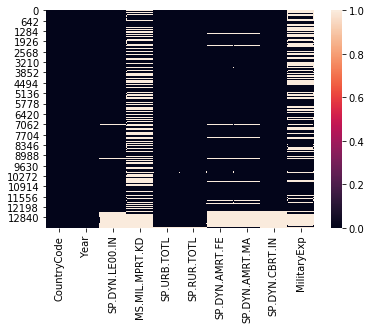

In [31]:
from seaborn import heatmap
heatmap(tot2.isnull())

#### Intermediate saving of the dataset

In [32]:
tot2.to_csv(path_or_buf='./part/partialDF', index=False)

In [33]:
tot2 = pd.read_csv('./part/partialDF')
tot2.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN


In [34]:
dens = pd.read_csv('./part/density')

In [35]:
dens.head()

,CountryCode,Year,Density
0,ARB,1960,-9.249590e+07
1,CSS,1960,-4.190810e+06
2,CEB,1960,-9.140158e+07
3,EAS,1960,-1.042475e+09
4,EAP,1960,-8.964930e+08


In [36]:
tot3 = tot2.merge(dens, on=['CountryCode','Year'], how='left')

In [37]:
tot3.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN,-9.249590e+07
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN,-4.190810e+06
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN,-9.140158e+07
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN,-1.042475e+09
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN,-8.964930e+08


### Columns explanation

SP.DYN.LE00.IN: Life expectancy at birth

MS.MIL.MPRT.KD: Arms import

SP.URB.TOTL: Urban population

SP.RUR.TOTL: Rural population

SP.DYN.AMRT.FE: Mortality rate, female

SP.DYN.AMRT.MA: Mortality rate, male

SP.DYN.CBRT.IN: Birth rate (per 1000 people)

MilitaryExp: Military expenditure made in the Year

Density: population density

### Now I have to insert the count of all the attacks in one year in one single country.

In [60]:
cnt = pd.read_csv('./dataset/tot_year+country')

In [62]:
cnt["iyear"] = cnt["iyear"].astype(int)

In [63]:
cnt.dtypes

CountryCode     object
iyear            int64
cnt            float64
dtype: object

In [72]:
cnt.shape

(3509, 3)

In [73]:
tot4 = tot3.merge(cnt, left_on=['CountryCode','Year'], right_on=['CountryCode','iyear'], how='left')

In [74]:
tot4

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density,iyear,cnt
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN,-9.249590e+07,NaN,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN,-4.190810e+06,NaN,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN,-9.140158e+07,NaN,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN,-1.042475e+09,NaN,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN,-8.964930e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13468,SRB,1985,NaN,NaN,NaN,NaN,107.875400,199.063200,NaN,NaN,NaN,NaN,NaN
13469,SRB,1986,NaN,NaN,NaN,NaN,106.232200,201.110600,NaN,NaN,NaN,NaN,NaN
13470,SRB,1987,NaN,NaN,NaN,NaN,104.589000,203.158000,NaN,NaN,NaN,NaN,NaN
13471,SRB,1988,NaN,NaN,NaN,NaN,104.610400,201.766000,NaN,NaN,NaN,NaN,NaN


In [67]:
tot4[tot4.cnt.isnull()]

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density,iyear,cnt
0,ARB,1960,46.847059,5.380000e+08,28937699.0,63558203.0,298.935703,357.705584,47.697888,NaN,-9.249590e+07,NaN,NaN
1,CSS,1960,62.271795,NaN,1324191.0,2866619.0,201.475579,261.118888,40.017001,NaN,-4.190810e+06,NaN,NaN
2,CEB,1960,67.823762,2.139000e+09,40680946.0,50720637.0,124.749727,201.048873,19.117435,NaN,-9.140158e+07,NaN,NaN
3,EAS,1960,48.298317,5.344000e+09,231871389.0,799992005.0,326.366329,446.838421,26.362350,NaN,-1.042475e+09,NaN,NaN
4,EAP,1960,45.549658,3.535000e+09,151665806.0,744827185.0,353.252556,478.537086,26.635950,NaN,-8.964930e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13468,SRB,1985,NaN,NaN,NaN,NaN,107.875400,199.063200,NaN,NaN,NaN,NaN,NaN
13469,SRB,1986,NaN,NaN,NaN,NaN,106.232200,201.110600,NaN,NaN,NaN,NaN,NaN
13470,SRB,1987,NaN,NaN,NaN,NaN,104.589000,203.158000,NaN,NaN,NaN,NaN,NaN
13471,SRB,1988,NaN,NaN,NaN,NaN,104.610400,201.766000,NaN,NaN,NaN,NaN,NaN


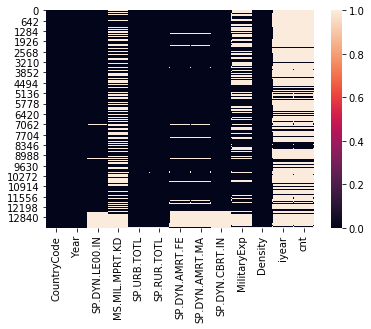

In [75]:
from seaborn import heatmap
heatmap(tot4.isnull())

In [76]:
tot4.to_csv(path_or_buf='./part/DF1sthyp', index=False)

In [77]:
tot4 = pd.read_csv('./part/DF1sthyp')

## We can get rid of the records where we have missing values for the life expectance, mortality rate (male), mortality rate (female) and birth rate
Let's remind the associated Codes:
- Life Expectancy: <strong>SP.DYN.LE00.IN</strong>
- Mortality Rate (male): <strong>SP.DYN.AMRT.MA</strong>
- Mortality Rate (female): <strong>SP.DYN.AMRT.FE</strong>
- Birth Rate: <strong>SP.DYN.CBRT.IN</strong>

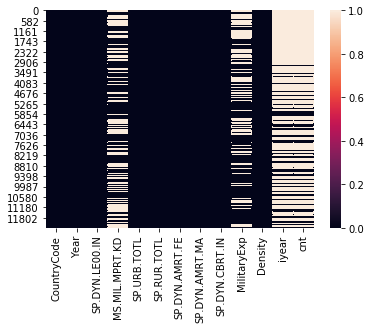

In [78]:
tot4 = tot4.dropna(subset=['SP.DYN.LE00.IN', 'SP.DYN.AMRT.MA', 'SP.DYN.AMRT.FE', 'SP.DYN.CBRT.IN'])
heatmap(tot4.isnull())

As we can see, we lost just about 1000 samples, over almost 13.000; that's a reasonable compromise

## Since the missing values about arms import and military expenditures are too much (about half of the records), we cannot just drop them; so we try to mitigate this problem by substituting the NaN values with the mean of the recorded values
Again, let's remind the Codes we have to work on:
- arms import: <strong>MS.MIL.MPRT.KD</strong>
- military expenditures: <strong>MilitaryExp</strong>

In [79]:
exp_not_nans = tot4.dropna(subset=['MilitaryExp']) #keep track of the not NaNs, on which we'll perform the mean
arms_not_nans = tot4.dropna(subset=['MS.MIL.MPRT.KD']) #same for this column
exp_mean = exp_not_nans['MilitaryExp'].mean() 
arms_mean = arms_not_nans['MS.MIL.MPRT.KD'].mean()
tot4['MilitaryExp'] = tot4['MilitaryExp'].replace(np.nan, exp_mean)
tot4['MS.MIL.MPRT.KD'] = tot4['MS.MIL.MPRT.KD'].replace(np.nan, arms_mean)

In [82]:
del tot4['iyear']

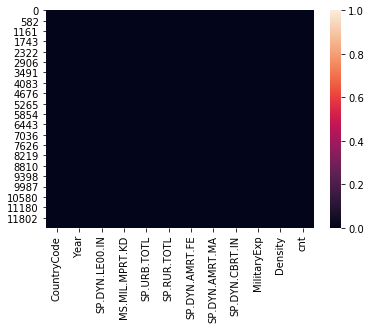

In [83]:
heatmap(tot4.isnull())

## Finally, we can notice that we have some records for which we don't have the number of attacks carried out in that year (cnt); since the point of terrorism is to make the world know about the attacks, it's a good assumption to think no relevant activities have been carried out. So that, we'll substitute the NaNs with a 0. 

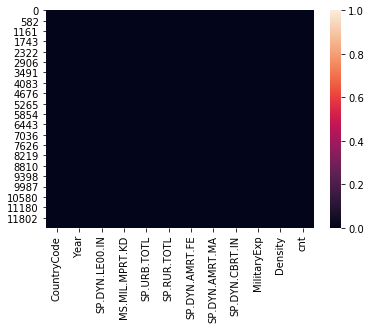

In [84]:
tot4['cnt'] = tot4['cnt'].replace(np.nan, 0)
heatmap(tot4.isnull())

In [85]:
tot4[tot4.Density < 0].CountryCode.unique()

array(['ARB', 'CSS', 'CEB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU',
       'FCS', 'HPC', 'HIC', 'NOC', 'OEC', 'LCN', 'LAC', 'LDC', 'LMY',
       'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'OSS', 'PSS',
       'SST', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD', 'CHI', 'ZAR', 'COG',
       'MNE', 'MMR', 'ROM', 'SSD', 'TMP', 'WBG'], dtype=object)

WHen creating the density dataset (in the script 'Density creation') we assigned a negativa density to the CountryCodes that didn't match. Here we look at them, and we see that they corresponds to agglomerations of states (Arab World, Caribbean small states, Central Europe and the Baltics...), so we don't care about them, because the single states are ALREADY in our dataset, so we delete them.



In [86]:
tot4 = tot4[tot4.Density > 0]

In [87]:
tot4.head()

,CountryCode,Year,SP.DYN.LE00.IN,MS.MIL.MPRT.KD,SP.URB.TOTL,SP.RUR.TOTL,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SP.DYN.CBRT.IN,MilitaryExp,Density,cnt
33,AFG,1960,32.328512,4.000000e+07,739462.0,8255331.0,551.1210,604.5970,51.276,2.252607e+10,13.891572,0.0
34,ALB,1960,62.254366,6.200000e+07,493982.0,1114818.0,151.0588,160.4806,42.240,2.252607e+10,55.962154,0.0
35,DZA,1960,46.135122,1.451501e+09,3394205.0,7730687.0,323.2800,373.1320,49.671,2.252607e+10,4.670910,0.0
36,AGO,1960,32.984829,1.451501e+09,550013.0,4720831.0,500.8860,565.4100,54.423,2.252607e+10,4.227837,0.0
37,ATG,1960,61.782732,1.451501e+09,21684.0,32997.0,244.9240,275.5520,32.920,2.252607e+10,123.433409,0.0


### The dataset is finally completed and saved.

In [88]:
tot4.to_csv(path_or_buf='./part/DF1sthypTOT', index=False)

In [89]:
df = pd.read_csv('./part/DF1sthypTOT')

In [90]:
df.dtypes

CountryCode        object
Year                int64
SP.DYN.LE00.IN    float64
MS.MIL.MPRT.KD    float64
SP.URB.TOTL       float64
SP.RUR.TOTL       float64
SP.DYN.AMRT.FE    float64
SP.DYN.AMRT.MA    float64
SP.DYN.CBRT.IN    float64
MilitaryExp       float64
Density           float64
cnt               float64
dtype: object

In [91]:
df.shape

(9675, 12)